<a href="https://colab.research.google.com/github/Sion1225/Study-Deeplearning-NLP/blob/master/BIO_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/train.txt", filename="/content/drive/MyDrive/GitHub/Study-Deeplearning-NLP/DataSet/BIO_train.txt")

('/content/drive/MyDrive/GitHub/Study-Deeplearning-NLP/DataSet/BIO_train.txt',
 <http.client.HTTPMessage at 0x7fdb906d74f0>)

In [51]:
f = open("/content/drive/MyDrive/GitHub/Study-Deeplearning-NLP/DataSet/BIO_train.txt", 'r')
[f.readline() for i in range(30)]

['-DOCSTART- -X- -X- O\n',
 '\n',
 'EU NNP B-NP B-ORG\n',
 'rejects VBZ B-VP O\n',
 'German JJ B-NP B-MISC\n',
 'call NN I-NP O\n',
 'to TO B-VP O\n',
 'boycott VB I-VP O\n',
 'British JJ B-NP B-MISC\n',
 'lamb NN I-NP O\n',
 '. . O O\n',
 '\n',
 'Peter NNP B-NP B-PER\n',
 'Blackburn NNP I-NP I-PER\n',
 '\n',
 'BRUSSELS NNP B-NP B-LOC\n',
 '1996-08-22 CD I-NP O\n',
 '\n',
 'The DT B-NP O\n',
 'European NNP I-NP B-ORG\n',
 'Commission NNP I-NP I-ORG\n',
 'said VBD B-VP O\n',
 'on IN B-PP O\n',
 'Thursday NNP B-NP O\n',
 'it PRP B-NP O\n',
 'disagreed VBD B-VP O\n',
 'with IN B-PP O\n',
 'German JJ B-NP B-MISC\n',
 'advice NN I-NP O\n',
 'to TO B-PP O\n']

In [52]:
f.seek(0)

0

In [53]:
tagged_sentences = []
sentence = []

for line in f :
    if len(line)==0 or line.startswith("-DOCSTART") or line[0]=="\n" :
        if len(sentence) > 0 :
            tagged_sentences.append(sentence)
            sentence = []
            

    else :
        splits = line.split(' ')
        splits[-1] = re.sub(r'\n', '', splits[-1])
        word = splits[0].lower()
        sentence.append([word, splits[-1]])  

f.close()

[print(tagged_sentences[i], "\n") for i in range(3)]

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']] 

[['peter', 'B-PER'], ['blackburn', 'I-PER']] 

[['brussels', 'B-LOC'], ['1996-08-22', 'O']] 



[None, None, None]

In [54]:
print("Length of Samples: ", len(tagged_sentences))

Length of Samples:  14041


In [55]:
sentences, ner_tags = [], []

for tagged_sentence in tagged_sentences :
    sentence, tag_info = zip(*tagged_sentence) #unpacking
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))

print(sentences[:3])
print(ner_tags[:3])

[['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.'], ['peter', 'blackburn'], ['brussels', '1996-08-22']]
[['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O'], ['B-PER', 'I-PER'], ['B-LOC', 'O']]


Maximum length of samples :  113
Average length of samples :  14.501887329962253
Minimum length of samples :  1


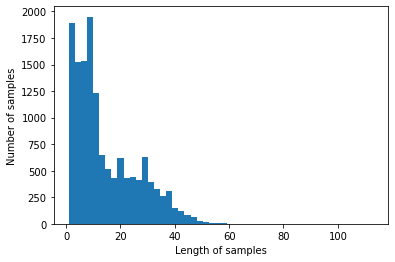

In [56]:
print("Maximum length of samples : ", max(len(sentence) for sentence in sentences))
print("Average length of samples : ", (sum(map(len,sentences))/len(sentences)))
print("Minimum length of samples : ", min(len(sentence) for sentence in sentences))

plt.hist([len(sentence) for sentence in sentences], bins=50)
plt.xlabel("Length of samples")
plt.ylabel("Number of samples")
plt.show()

In [57]:
temp = sum(sentences,[])

In [58]:
print(len(set(temp)))

21009


In [59]:
vocab_size = 5000

#Integer Encoding
src_tokenizer = Tokenizer(num_words=vocab_size, oov_token="OOV")
src_tokenizer.fit_on_texts(sentences)
print(src_tokenizer.word_index)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)
print(tar_tokenizer.word_index)

{'OOV': 1, 'the': 2, '.': 3, ',': 4, 'of': 5, 'in': 6, 'to': 7, 'a': 8, 'and': 9, '(': 10, ')': 11, '"': 12, 'on': 13, 'said': 14, "'s": 15, 'for': 16, '1': 17, '-': 18, 'at': 19, 'was': 20, '2': 21, '0': 22, '3': 23, 'with': 24, 'that': 25, 'he': 26, 'from': 27, 'it': 28, 'by': 29, 'is': 30, ':': 31, 'as': 32, '4': 33, 'had': 34, 'his': 35, 'has': 36, 'but': 37, 'an': 38, 'not': 39, 'were': 40, 'be': 41, 'after': 42, 'have': 43, 'first': 44, 'new': 45, 'who': 46, 'will': 47, 'they': 48, '5': 49, 'two': 50, 'u.s.': 51, 'been': 52, '$': 53, '--': 54, 'their': 55, 'beat': 56, 'are': 57, '6': 58, 'which': 59, 'would': 60, 'this': 61, 'up': 62, 'its': 63, 'year': 64, 'i': 65, 'last': 66, 'percent': 67, 'out': 68, 'we': 69, 'thursday': 70, 'one': 71, 'million': 72, 'over': 73, 'government': 74, 'wednesday': 75, 'police': 76, '7': 77, 'results': 78, 'against': 79, 'second': 80, 'when': 81, '/': 82, 'also': 83, 'tuesday': 84, 'three': 85, 'soccer': 86, 'president': 87, 'no': 88, 'division': 8

In [66]:
tag_size = len(tar_tokenizer.word_index) + 1
print("Size of vocabulary set : ", vocab_size)
print("Size of named entity : ", tag_size)

Size of vocabulary set :  5000
Size of named entity :  10


In [67]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [68]:
print("X_train[:3] : ",X_train[:3])
print("y_train[:3] : ",y_train[:3])

X_train[:3] :  [[989, 1, 205, 629, 7, 3939, 216, 1, 3], [774, 1872], [726, 150]]
y_train[:3] :  [[4, 1, 7, 1, 1, 1, 7, 1, 1], [3, 5], [2, 1]]


In [69]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word
print(index_to_word)
print(index_to_ner)

{1: 'OOV', 2: 'the', 3: '.', 4: ',', 5: 'of', 6: 'in', 7: 'to', 8: 'a', 9: 'and', 10: '(', 11: ')', 12: '"', 13: 'on', 14: 'said', 15: "'s", 16: 'for', 17: '1', 18: '-', 19: 'at', 20: 'was', 21: '2', 22: '0', 23: '3', 24: 'with', 25: 'that', 26: 'he', 27: 'from', 28: 'it', 29: 'by', 30: 'is', 31: ':', 32: 'as', 33: '4', 34: 'had', 35: 'his', 36: 'has', 37: 'but', 38: 'an', 39: 'not', 40: 'were', 41: 'be', 42: 'after', 43: 'have', 44: 'first', 45: 'new', 46: 'who', 47: 'will', 48: 'they', 49: '5', 50: 'two', 51: 'u.s.', 52: 'been', 53: '$', 54: '--', 55: 'their', 56: 'beat', 57: 'are', 58: '6', 59: 'which', 60: 'would', 61: 'this', 62: 'up', 63: 'its', 64: 'year', 65: 'i', 66: 'last', 67: 'percent', 68: 'out', 69: 'we', 70: 'thursday', 71: 'one', 72: 'million', 73: 'over', 74: 'government', 75: 'wednesday', 76: 'police', 77: '7', 78: 'results', 79: 'against', 80: 'second', 81: 'when', 82: '/', 83: 'also', 84: 'tuesday', 85: 'three', 86: 'soccer', 87: 'president', 88: 'no', 89: 'division

In [70]:
max_len = 70
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [71]:
y_train = to_categorical(y_train, num_classes=tag_size)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=1225)

In [73]:
print("Shape of train sample matrix : ", X_train.shape)
print("Shape of train sample's label matrix : ", y_train.shape)
print("Shape of test sample matrix : ", X_test.shape)
print("Shape of test sample's label matrix : ", y_test.shape)

Shape of train sample matrix :  (11232, 70)
Shape of train sample's label matrix :  (11232, 70, 10)
Shape of test sample matrix :  (2809, 70)
Shape of test sample's label matrix :  (2809, 70, 10)


In [74]:
#model

In [75]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
embedding_dim = 128
hidden_units = 128

inputs = Input(shape=(max_len))
hidden = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, mask_zero=True)(inputs)
hidden = Bidirectional(LSTM(hidden_units, return_sequences=True))(hidden)
outputs = TimeDistributed(Dense(tag_size, activation="softmax"))(hidden)
model = Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), metrics=["accuracy"])

In [77]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), callbacks=es)

Epoch 1/10
176/176 [==============================] - 27s 98ms/step - loss: 0.7697 - accuracy: 0.8306 - val_loss: 0.4426 - val_accuracy: 0.8639
Epoch 2/10
176/176 [==============================] - 8s 44ms/step - loss: 0.3469 - accuracy: 0.8957 - val_loss: 0.2503 - val_accuracy: 0.9286
Epoch 3/10
176/176 [==============================] - 6s 34ms/step - loss: 0.1913 - accuracy: 0.9446 - val_loss: 0.1775 - val_accuracy: 0.9492
Epoch 4/10
176/176 [==============================] - 5s 27ms/step - loss: 0.1376 - accuracy: 0.9595 - val_loss: 0.1511 - val_accuracy: 0.9573
Epoch 5/10
176/176 [==============================] - 5s 31ms/step - loss: 0.1096 - accuracy: 0.9678 - val_loss: 0.1404 - val_accuracy: 0.9607
Epoch 6/10
176/176 [==============================] - 4s 22ms/step - loss: 0.0899 - accuracy: 0.9732 - val_loss: 0.1436 - val_accuracy: 0.9602
Epoch 7/10
176/176 [==============================] - 3s 18ms/step - loss: 0.0768 - accuracy: 0.9769 - val_loss: 0.1437 - val_accuracy: 0.961

In [78]:
print("Test accuracy : %.4f" % (model.evaluate(X_test, y_test)[1]))

88/88 [==============================] - 1s 6ms/step - loss: 0.1435 - accuracy: 0.9619
Test accuracy : 0.9619


In [105]:
i = 13

y_predicted = model.predict(np.array([X_test[i]]))
print(y_predicted)

1/1 [==============================] - 0s 22ms/step
[[[4.3944028e-06 3.0529689e-05 9.9510962e-01 1.2231638e-03 5.9799687e-04
   5.3374289e-04 1.0502386e-04 3.6791713e-05 2.3523464e-03 6.4253722e-06]
  [3.1039821e-05 2.4231402e-03 2.8583350e-02 1.4146957e-05 1.0418983e-05
   5.9102424e-03 3.5783460e-03 1.3024661e-05 9.5880115e-01 6.3518673e-04]
  [3.4127123e-07 9.9912161e-01 9.0785928e-05 2.2383088e-06 2.1960157e-07
   4.7926646e-06 5.5838053e-05 1.7644304e-07 6.7944045e-04 4.4555309e-05]
  [2.1573710e-07 9.3639654e-05 9.9962211e-01 6.3364176e-05 2.9279030e-05
   2.6934176e-06 2.2331431e-06 3.4221075e-06 1.8264195e-04 2.6305315e-07]
  [6.0907310e-09 9.9996424e-01 5.6617012e-07 7.9091855e-10 1.8971558e-09
   2.4776078e-08 3.2081471e-06 3.1619596e-08 2.6415473e-05 5.5671749e-06]
  [9.7385868e-02 1.0623197e-01 1.0451002e-01 9.8564103e-02 1.0711275e-01
   9.3561761e-02 9.6311726e-02 9.9616989e-02 9.7293012e-02 9.9411838e-02]
  [9.7385868e-02 1.0623197e-01 1.0451002e-01 9.8564103e-02 1.07112

In [106]:
y_predicted = np.argmax(y_predicted, axis=-1)
print(y_predicted)

[[2 8 1 2 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]]


In [107]:
print(y_test[i])
labels = np.argmax(y_test[i],-1)
print(labels)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0.

In [108]:
for word, tag, pred in zip(X_test[i],labels, y_predicted[0]) :
    if word != 0:
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag].upper(), index_to_ner[pred].upper()))

novye            : B-LOC   B-LOC
atagi            : I-LOC   I-LOC
,                : O       O
russia           : B-LOC   B-LOC
1996-08-22       : O       O
